In [1]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data= pd.read_csv('datasets/census.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 3.3+ MB


In [3]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [4]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

C:\Users\Bisma\Desktop\finding-donors-for-charity-ML-udacity\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


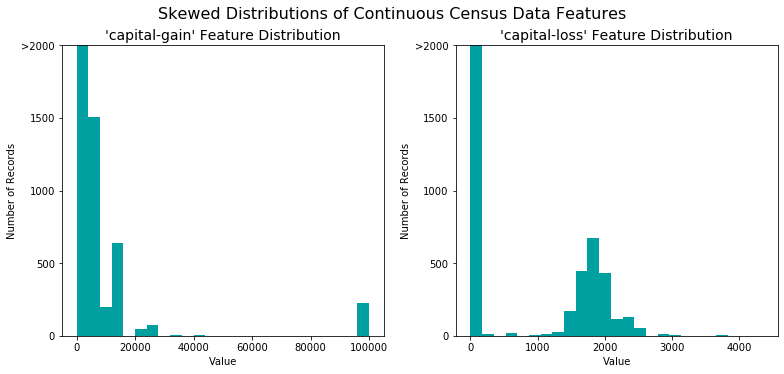

In [5]:
vs.distribution(data)

In [6]:
num_feats= data.dtypes[data.dtypes!='object'].index
skew_feats= data[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew': skew_feats})

In [7]:
skewness

,Skew
capital-gain,11.789002
capital-loss,4.516304
age,0.532816
hours-per-week,0.340545
education-num,-0.310621


In [8]:
skewed= ['capital-gain', 'capital-loss']

In [9]:
features_log_transformed= pd.DataFrame(data=features_raw)

In [10]:
data[skewed]

,capital-gain,capital-loss
0,2174.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
45217,0.0,0.0
45218,0.0,0.0
45219,0.0,0.0
45220,5455.0,0.0


In [11]:
features_log_transformed[skewed]= features_raw[skewed].apply(lambda x: np.log(x+1))

In [12]:
features_log_transformed[skewed]

,capital-gain,capital-loss
0,7.684784,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
45217,0.000000,0.0
45218,0.000000,0.0
45219,0.000000,0.0
45220,8.604471,0.0


In [13]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
from sklearn import preprocessing
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_log_scale_transformed= pd.DataFrame(data=features_log_transformed)
features_log_scale_transformed[numerical]= preprocessing.scale(features_log_transformed[numerical])

In [15]:
display(features_log_scale_transformed.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.034201,State-gov,Bachelors,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,2.815336,-0.222752,-0.078120,United-States
1,0.866417,Self-emp-not-inc,Bachelors,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.300328,-0.222752,-2.326738,United-States
2,-0.041455,Private,HS-grad,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.300328,-0.222752,-0.078120,United-States
3,1.093385,Private,11th,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.300328,-0.222752,-0.078120,United-States
4,-0.798015,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.300328,-0.222752,-0.078120,Cuba


In [16]:
features_final= pd.get_dummies(features_log_scale_transformed)

In [17]:
income= income_raw.apply(lambda x: 1 if x == ">50K" else 0)

In [18]:
encoded= list(features_final.columns)

In [19]:
encoded

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_level_ 10th',
 'education_level_ 11th',
 'education_level_ 12th',
 'education_level_ 1st-4th',
 'education_level_ 5th-6th',
 'education_level_ 7th-8th',
 'education_level_ 9th',
 'education_level_ Assoc-acdm',
 'education_level_ Assoc-voc',
 'education_level_ Bachelors',
 'education_level_ Doctorate',
 'education_level_ HS-grad',
 'education_level_ Masters',
 'education_level_ Preschool',
 'education_level_ Prof-school',
 'education_level_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-cleri

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features_final, income, test_size=0.2, random_state=0)

In [21]:
print("Training set has {} samples".format(X_train.shape[0]))


Training set has 36177 samples


In [22]:
print("Test set has {} samples".format(X_test.shape[0]))

Test set has 9045 samples


In [23]:
data.shape

(45222, 14)

In [24]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' 
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + 0.5**2) * ((precision * recall) / ((0.5**2 * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [25]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    results={}
    start= time()
    learner= learner.fit(X_train[:sample_size], y_train[:sample_size])
    end= time()
    
    results['train_time']= end- start
    start= time()
    predictions_test= learner.predict(X_test)
    predictions_train= learner.predict(X_train[:300])
    end= time()
    
    results['pred_time']= end- start
    
    results['acc_train']= accuracy_score(y_train[:300], predictions_train)
    
    results['acc_test']= accuracy_score(y_test, predictions_test)
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


C:\Users\Bisma\Desktop\finding-donors-for-charity-ML-udacity\visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


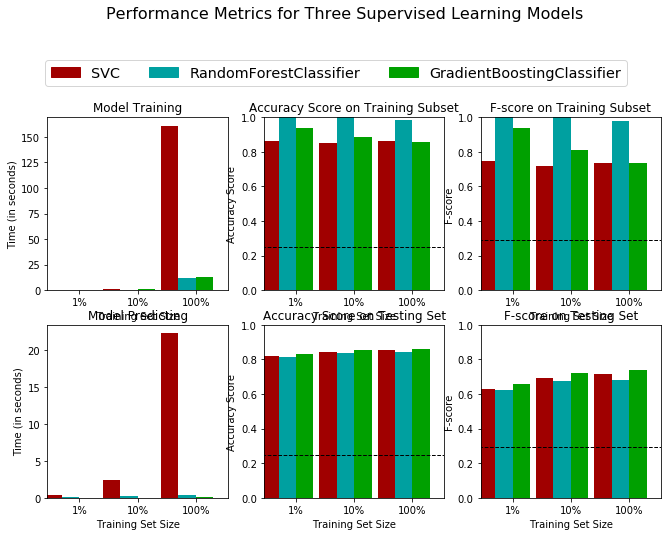

In [26]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf_A = SVC(random_state=10)
clf_B = RandomForestClassifier(random_state=10)
clf_C = GradientBoostingClassifier(random_state=10)

samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

results={}

for clf in [clf_A, clf_B, clf_C]:
    clf_name= clf.__class__.__name__
    results[clf_name]= {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i]= train_predict(clf, samples, X_train, y_train, X_test, y_test)
vs.evaluate(results, accuracy, fscore)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, fbeta_score
# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=10)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {
              'max_depth' : [3,5,7],
              'n_estimators' :[25,50,150],
              'min_samples_split' : [3,4,5]
              }
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, n_jobs=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
print(best_clf)
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

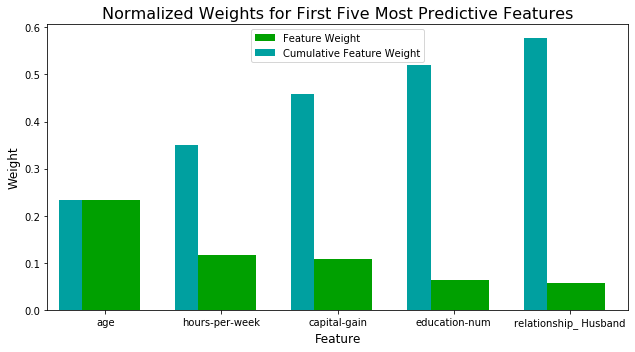

In [28]:
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(random_state=7).fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [ ]:
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))